In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io

In [1]:
# le bon m_a n'était pas appliqué durant les mesures, donc un correctif est appliqué
# bon ma = 0.603
# ma lors des mesures = 0.5
ma_coeff = 1.206 # 0.603/0.5

In [27]:
df = pd.read_csv("../mesures/seance_2/WA000002.CSV", skiprows=[1])
u_phase1 = df["CH2"].to_numpy()
u_out1 = df["CH1"].to_numpy()
i_out1 = df["CH3"].to_numpy()
time = df["Source"].to_numpy()
time

array([-0.12288, -0.12286, -0.12284, ...,  0.12282,  0.12284,  0.12286])

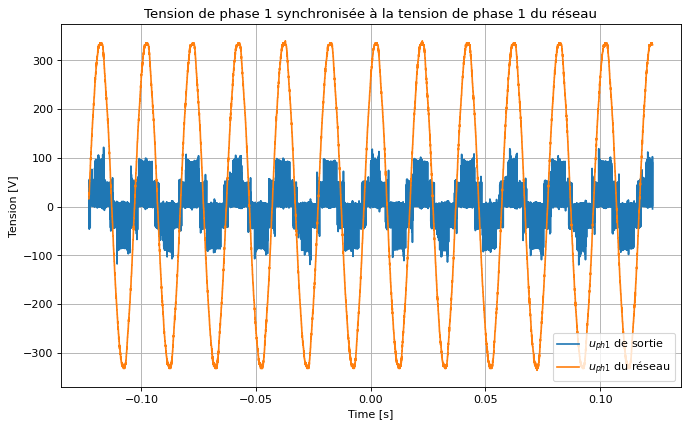

In [28]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time, u_out1*1.206, label=r'$u_{ph1}$ de sortie')
plt.plot(time, u_phase1, label=r'$u_{ph1}$ du réseau')
#plt.plot(time, i_out1*1.206/100, label=r'$i_{ph1}$ de sortie')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Tension [V]")
plt.title("Tension de phase 1 synchronisée à la tension de phase 1 du réseau")
plt.legend()
plt.savefig("../images/ul1_ul1res.png")

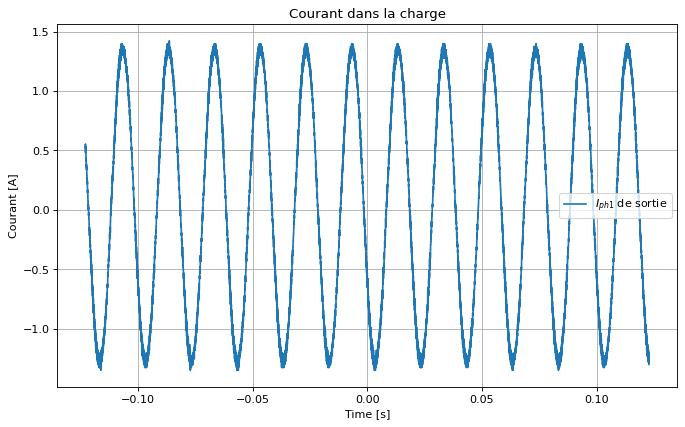

In [29]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time, i_out1/100*1.206, label=r'$I_{ph1}$ de sortie')
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Courant [A]")
plt.legend()
plt.title("Courant dans la charge")
plt.savefig("../images/i_out.png")

In [30]:
mat = io.loadmat("../mesures/seance_2/data08_dec.mat")
U_L1 = mat["mat"][:,0]
U_L2 = mat["mat"][:,1]
U_L3 = mat["mat"][:,2]
U_comm_ideal = mat["mat"][:,4]
time_vec = np.linspace(0, len(U_L1)*0.0002, len(U_L1))

Ualpha = mat["mat2"][:,0]
Ubeta = mat["mat2"][:,1]
theta = mat["mat2"][:,2]
Ud = mat["mat2"][:,3]
Uq_var = mat["mat2"][:,4]


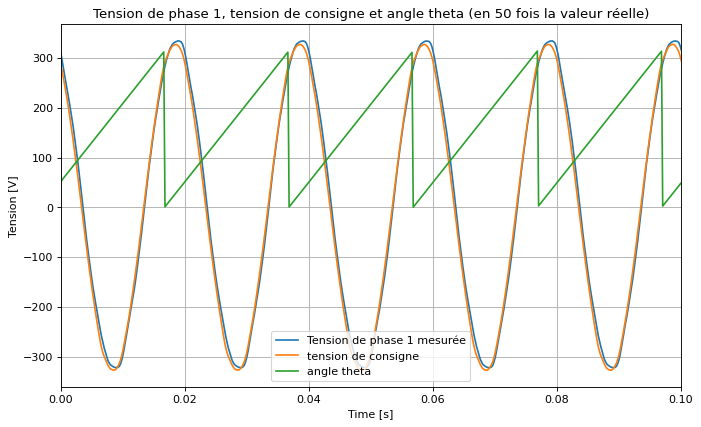

In [31]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time_vec, U_L1, label="Tension de phase 1 mesurée")
plt.plot(time_vec, U_comm_ideal, label="tension de consigne")
plt.plot(time_vec, theta*50, label="angle theta")
plt.grid()
plt.xlim([0, 0.1])
plt.xlabel("Time [s]")
plt.ylabel("Tension [V]")
plt.legend()
plt.title("Tension de phase 1, tension de consigne et angle theta (en 50 fois la valeur réelle)")
plt.savefig("../images/u_l1_u_ideal_theta.png")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


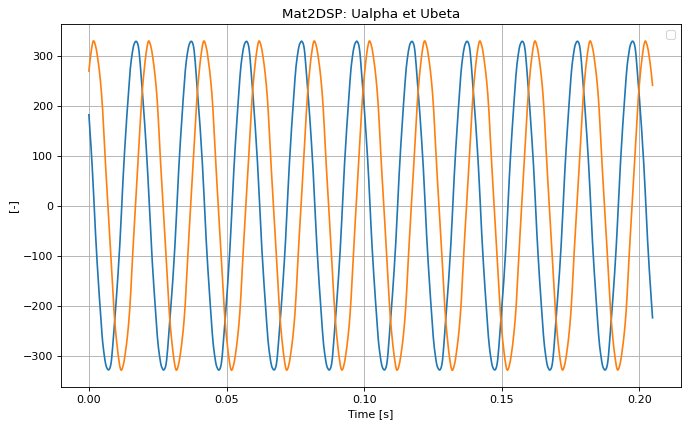

In [32]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time_vec, Ualpha)
plt.plot(time_vec, Ubeta)
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("[-]")
plt.legend()
plt.title("Mat2DSP: Ualpha et Ubeta")
plt.savefig("../images/ualpha_ubeta.png")